In [2]:
import sys; sys.path.append('../../wwa'); from wwa import *

In [3]:
cities = ["Beauvais", "Zurich", "Mannheim", "Madrid", "de Bilt"]
px = pd.DataFrame({k : get_latlon(k) for k in cities}).transpose()

In [4]:
era5 = convert_units_to(decode_times(xr.open_dataset("era5_tmax_daily_eu_1_max_50.nc", decode_times = False)).max_tmax, "degC")
era5 = era5.where(regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(era5.lon, era5.lat) == 0)
era5 = era5.sel(lon = slice(-12,30), lat = slice(60, None))

In [5]:
regions = {"uk22" : {"box" : [-3.5,0.5,51.25,54], "label" : "1"},
           "mo22" : {"box" : [-5,13,38,52], "label" : "2"},
           "med23" : {"box" : [-10,5,30,40], "label" : "3"},
           "eu23" : {"box" : [-5,25,36,45], "label" : "4"},
          }

def box(xn,xx,yn,yx, ax = None, **kwargs):
    if ax is None: ax = plt.gca()
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], **kwargs)

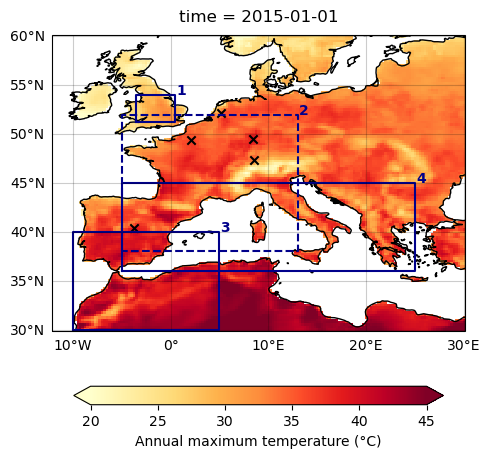

In [5]:
fig, ax = plt.subplots(subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

fig_kwargs = {"cmap" : "YlOrRd", "vmin" : 20, "vmax" : 45}
cbar_kwargs = {"location" : "bottom", "fraction" : 0.05, "label" : "Annual maximum temperature (°C)"}

era5.sel(time = "2015").plot(ax = ax, **fig_kwargs, cbar_kwargs = cbar_kwargs)

ax.gridlines(draw_labels = ["bottom", "left"], color = "k", alpha = 0.2)
ax.coastlines()

ax.scatter(px.lon, px.lat, marker = "x", color = "k")
for k in regions.keys():
    if k == "mo22":
        ls = "--"
    else:
        ls = "-"
    box(*regions[k]["box"], ax = ax, color = "darkblue", ls = ls)
    ax.annotate(regions[k]["label"], xy = (regions[k]["box"][1]+0.1, regions[k]["box"][3]+0.1), fontweight = "bold", color = "darkblue")
    


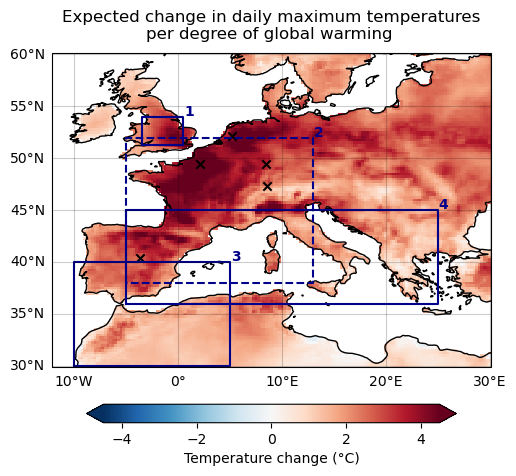

In [ ]:
gmst = pd.read_csv("../10_misc/gmst.csv", index_col = "time").loc[slice(1950, 2024)].to_xarray()

# fit a linear trend to GMST by replacing time with gmst values
gmst_coeffs = era5.assign_coords(time = gmst.Ta.values).polyfit("time", deg = 1).polyfit_coefficients

gmst_coeffs.sel(degree = 1).plot(vmin = -4.5, vmax = 4.5, cmap = "RdBu_r", subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                                cbar_kwargs = {"location" : "bottom", "fraction" : 0.05, "pad" : 0.1, "label" : "Temperature change (°C)", "extend" : "both"})

ax = plt.gca()

ax.gridlines(draw_labels = ["bottom", "left"], color = "k", alpha = 0.2)
ax.coastlines()

ax.scatter(px.lon, px.lat, marker = "x", color = "k")
for k in regions.keys():
    if k == "mo22":
        ls = "--"
    else:
        ls = "-"
    box(*regions[k]["box"], ax = ax, color = "darkblue", ls = ls)
    ax.annotate(regions[k]["label"], xy = (regions[k]["box"][1]+0.1, regions[k]["box"][3]+0.1), fontweight = "bold", color = "darkblue")

ax.set_title("Expected change in daily maximum temperatures\nper degree of global warming ")
plt.savefig("fig_temp-change-map.png")

Text(0.5, 1.0, 'Change in expected daily maximum temperatures\nsince 2000 due to global warming')

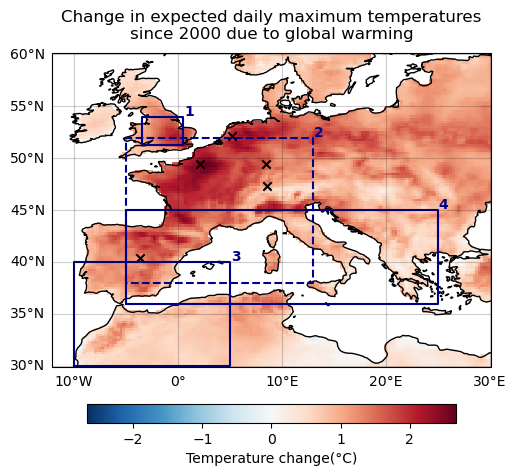

In [70]:
(gmst_coeffs.sel(degree = 1) * (gmst.sel(time = slice(2020, 2024)).mean() - gmst.sel(time = slice(1995, 2005)).mean())).Ta.plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()},
                                cbar_kwargs = {"location" : "bottom", "fraction" : 0.05, "pad" : 0.1, "label" : "Temperature change(°C)"})

ax = plt.gca()

ax.gridlines(draw_labels = ["bottom", "left"], color = "k", alpha = 0.2)
ax.coastlines()

ax.scatter(px.lon, px.lat, marker = "x", color = "k")
for k in regions.keys():
    if k == "mo22":
        ls = "--"
    else:
        ls = "-"
    box(*regions[k]["box"], ax = ax, color = "darkblue", ls = ls)
    ax.annotate(regions[k]["label"], xy = (regions[k]["box"][1]+0.1, regions[k]["box"][3]+0.1), fontweight = "bold", color = "darkblue")

ax.set_title("Change in expected daily maximum temperatures\nsince 2000 due to global warming")